In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers as L
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
base = ResNet50(include_top=False)

base.trainable = False
inputs = L.Input(shape=(224, 224, 3))
x = base(inputs, training=False)
x = L.GlobalAveragePooling2D()(x)
outputs = L.Dense(5)(x)

In [3]:
model = Model(inputs, outputs)
model.compile(Adam(), loss=CategoricalCrossentropy(from_logits=True), metrics=[CategoricalAccuracy()])
model.save_weights('checkpoints/resnet50_default.h5')

In [4]:
df = pd.read_csv('data/train.csv')
df = df[~df['path'].str.endswith('.gif')]

In [5]:
histories = []

for i, (trix, tsix) in enumerate(StratifiedKFold(n_splits=4).split(df, df['class'])):
    train_gen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        width_shift_range=[-60, 60], height_shift_range=[-60, 60],
        horizontal_flip=True, vertical_flip=True,
        zoom_range=[0.5, 1.5]
    ).flow_from_dataframe(df.iloc[trix], x_col='path', target_size=(224, 224), validate_filenames=False)
    test_gen = ImageDataGenerator(
        preprocessing_function=preprocess_input
    ).flow_from_dataframe(df.iloc[tsix], x_col='path', target_size=(224, 224), validate_filenames=False)
    model.load_weights('checkpoints/resnet50_default.h5')
    h = model.fit(
        train_gen, validation_data=test_gen, epochs=100,
        callbacks=[EarlyStopping(min_delta=0.01, patience=30, restore_best_weights=True)],
        verbose=2
    )
    histories.append(h)

Found 289 non-validated image filenames belonging to 5 classes.
Found 97 non-validated image filenames belonging to 5 classes.
Epoch 1/100
10/10 - 13s - loss: 1.4952 - categorical_accuracy: 0.3668 - val_loss: 0.8523 - val_categorical_accuracy: 0.6804


/home/jaidevd/conda/lib/python3.7/site-packages/PIL/Image.py:974: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 2/100
10/10 - 10s - loss: 0.8339 - categorical_accuracy: 0.7024 - val_loss: 0.5391 - val_categorical_accuracy: 0.8041
Epoch 3/100
10/10 - 10s - loss: 0.5864 - categorical_accuracy: 0.7647 - val_loss: 0.3700 - val_categorical_accuracy: 0.8557
Epoch 4/100
10/10 - 9s - loss: 0.4875 - categorical_accuracy: 0.8270 - val_loss: 0.3033 - val_categorical_accuracy: 0.9072
Epoch 5/100
10/10 - 9s - loss: 0.4461 - categorical_accuracy: 0.8478 - val_loss: 0.2553 - val_categorical_accuracy: 0.9175
Epoch 6/100
10/10 - 9s - loss: 0.4416 - categorical_accuracy: 0.8270 - val_loss: 0.2905 - val_categorical_accuracy: 0.8763
Epoch 7/100
10/10 - 9s - loss: 0.3746 - categorical_accuracy: 0.8754 - val_loss: 0.2350 - val_categorical_accuracy: 0.9278
Epoch 8/100
10/10 - 9s - loss: 0.3355 - categorical_accuracy: 0.8927 - val_loss: 0.2286 - val_categorical_accuracy: 0.9381
Epoch 9/100
10/10 - 9s - loss: 0.3028 - categorical_accuracy: 0.8927 - val_loss: 0.2184 - val_categorical_accuracy: 0.9072
Epoch 10/100
1

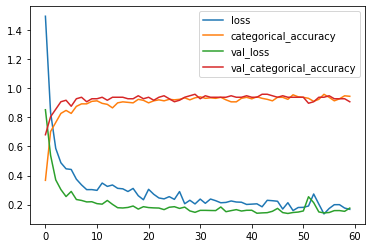

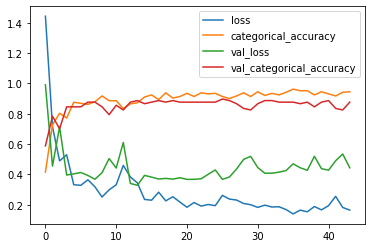

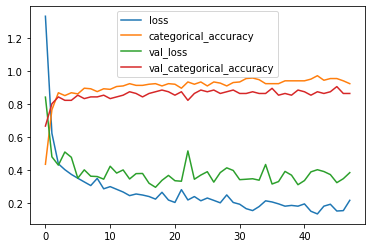

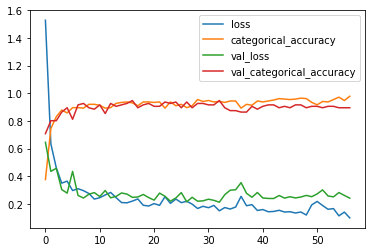

In [6]:
for h in histories:
    plt.figure()
    for k, v in h.history.items():
        plt.plot(v, label=k)
    plt.legend()

In [7]:
from sklearn.model_selection import train_test_split

xtr, xts = train_test_split(df, stratify=df['class'], test_size=0.2)

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=[-60, 60], height_shift_range=[-60, 60],
    horizontal_flip=True, vertical_flip=True,
    zoom_range=[0.5, 1.5]
).flow_from_dataframe(xtr, x_col='path', target_size=(224, 224), validate_filenames=False)
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_dataframe(xts, x_col='path', target_size=(224, 224), validate_filenames=False)
model.load_weights('checkpoints/resnet50_default.h5')
h = model.fit(
    train_gen, validation_data=test_gen, epochs=100,
    callbacks=[EarlyStopping(min_delta=0.01, patience=30, restore_best_weights=True)],
    verbose=2
)

Found 308 non-validated image filenames belonging to 5 classes.
Found 78 non-validated image filenames belonging to 5 classes.
Epoch 1/100


/home/jaidevd/conda/lib/python3.7/site-packages/PIL/Image.py:974: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 - 10s - loss: 1.3910 - categorical_accuracy: 0.3896 - val_loss: 0.8034 - val_categorical_accuracy: 0.7051
Epoch 2/100
10/10 - 10s - loss: 0.5850 - categorical_accuracy: 0.7760 - val_loss: 0.4059 - val_categorical_accuracy: 0.8333
Epoch 3/100
10/10 - 9s - loss: 0.4525 - categorical_accuracy: 0.8182 - val_loss: 0.3859 - val_categorical_accuracy: 0.8590
Epoch 4/100
10/10 - 9s - loss: 0.3768 - categorical_accuracy: 0.8604 - val_loss: 0.3994 - val_categorical_accuracy: 0.8718
Epoch 5/100
10/10 - 10s - loss: 0.3278 - categorical_accuracy: 0.8831 - val_loss: 0.3041 - val_categorical_accuracy: 0.8846
Epoch 6/100
10/10 - 9s - loss: 0.3424 - categorical_accuracy: 0.8571 - val_loss: 0.3020 - val_categorical_accuracy: 0.8974
Epoch 7/100
10/10 - 10s - loss: 0.2791 - categorical_accuracy: 0.8896 - val_loss: 0.3286 - val_categorical_accuracy: 0.8846
Epoch 8/100
10/10 - 10s - loss: 0.3139 - categorical_accuracy: 0.8929 - val_loss: 0.3243 - val_categorical_accuracy: 0.8974
Epoch 9/100
10/10 - 10s

In [8]:
model.save('checkpoints/resnet50-best.h5')

/home/jaidevd/conda/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
